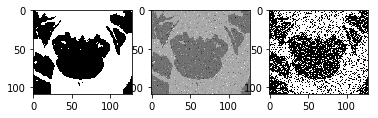

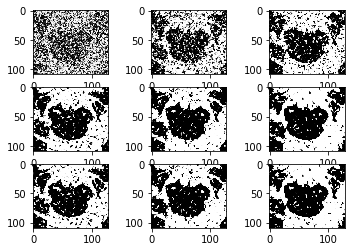

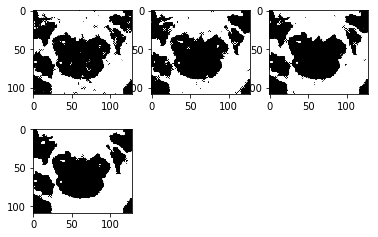

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] = 1-im2[index]
    return im2

def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]

        return n

    if(size == 8):
        n = []
        for x in range (i-1, i+1+1):
            for y in range(j-1, j+1+1):
                if (x >= 0 and x < M):
                    if (y >= 0 and y < N):
                        if (y != j or x != i):
                            n.append((x,y))
        return n


def L(x, y):
    if y == 0:
        y = -1
    return x*y

def Emu(w, x, i, j, mu, size = 4):
    sum = 0
    for neighbour in neighbours(i, j, x.shape[0], x.shape[1], size = size):
        sum += w[neighbour[0]][neighbour[1]] * mu[neighbour[0]][neighbour[1]]
    return sum

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def VarBayes(image, iterations):
    xNew = np.copy(image)
    mu = np.random.uniform(-1, 1, image.shape)
    newMu = np.copy(mu)
    w = np.ones(image.shape)
    x = np.random.choice((-1, 1), image.shape)
    for tau in range (0, iterations):
        for i in range (x.shape[0]):
            for j in range (x.shape[1]):
                miNT = Emu(w, x, i, j, mu)
                muNT = np.tanh(miNT + (1/2)*(L(1,image[i][j]) - L(-1,image[i][j])))
                newMu[i][j] = muNT
                if(tau == iterations-1):
                    xNew[i][j] = sigmoid(2*(miNT + (1/2)*(L(1,image[i][j]) - L(-1,image[i][j]))))
        mu = np.copy(newMu)
    return xNew

np.random.seed(42)

# proportion of pixels to alter
prop = 0.2
varSigma = 0.5
im = imread('resized_gray_pug.png')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')
plt.show()

out1 = VarBayes(im3, 1)
out2 = VarBayes(im3, 2)
out3 = VarBayes(im3, 3)
out4 = VarBayes(im3, 4)
out5 = VarBayes(im3, 5)
out6 = VarBayes(im3, 6)
out7 = VarBayes(im3, 7)
out8 = VarBayes(im3, 8)
out9 = VarBayes(im3, 9)
fig = plt.figure()
ax = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
ax.imshow(out1,cmap='gray')
ax2.imshow(out2,cmap='gray')
ax3.imshow(out3,cmap='gray')
ax4.imshow(out4,cmap='gray')
ax5.imshow(out5,cmap='gray')
ax6.imshow(out6,cmap='gray')
ax7.imshow(out4,cmap='gray')
ax8.imshow(out5,cmap='gray')
ax9.imshow(out6,cmap='gray')

plt.show()

out10 = VarBayes(im3, 10)
out15 = VarBayes(im3, 15)
out20 = VarBayes(im3, 20)
out100 = VarBayes(im3, 100)
fig = plt.figure()
ax = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax.imshow(out10,cmap='gray')
ax2.imshow(out15,cmap='gray')
ax3.imshow(out20,cmap='gray')
ax4.imshow(out100,cmap='gray')
plt.show()
